In [7]:
from coins.coininfo import CoinInfo
from coins.coin import Coin
from train.cointrain import CoinTrain
from coins.coinprice import CoinPrice
from twitter.statistics import Statistics
from twitter.tweetio import TweetIO
from twitter.sentiment import SentimentAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM,Conv1D,MaxPooling1D
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
import keras.backend as K
from train.prediction import Prediction
from sklearn import preprocessing
import math



In [8]:
print('Main starts training')

pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

cinfo=CoinInfo()
#coinlist=cinfo.list_coins('./data/altcoin-1hour')

## choosing coin
coin=Coin()
#coin.path="./data/altcoin-1hour/neo.csv"
#coin.name="neo"
#coin.ico="2017-05-01"
#coin.path="./data/altcoin-1hour/gnt.csv"
#coin.name="gnt"
#coin.ico="2017-05-01"
coin.path="./data/altcoin-1hour/gnt.csv"
coin.name="gnt"
coin.ico="2017-09-1"



tweetio=TweetIO()
coin.read_from_storeage("prepare2")

print(coin.pricehourly.head())


cointrain=CoinTrain()
raisei=1.7
X=cointrain.create_buy_sig(coin,aimraise=raisei,declinelimit=raisei/(-0.5),offset=4)
X_gtdf=cointrain.increase_by_one_hour(coin.gtdf)
X_grtdf=cointrain.increase_by_one_hour(coin.grtdf)




Main starts training
init TweetIO
init TweetIO
Reading coin from storage:  gnt
reading  ./data/altcoin-storage/gnt_tweets_prepare2.pkl
reading  ./data/altcoin-storage/gnt_retweets_prepare2.pkl
reading  ./data/altcoin-storage/gnt_grtdf_prepare2.pkl
reading  ./data/altcoin-storage/gnt_gtdf_prepare2.pkl
reading  ./data/altcoin-storage/gnt_pricehourly_prepare2.pkl
reading  ./data/altcoin-storage/gnt_data_to_predict_prepare2.pkl
             datetime      open      high       low     close  volumefrom  \
0 2017-04-17 23:00:00  0.000086  0.000096  0.000070  0.000076    85125.84   
1 2017-04-18 00:00:00  0.000076  0.000095  0.000076  0.000080    60987.25   
2 2017-04-18 01:00:00  0.000080  0.000087  0.000077  0.000084    97846.87   
3 2017-04-18 02:00:00  0.000084  0.000118  0.000079  0.000083   123756.55   
4 2017-04-18 03:00:00  0.000083  0.000083  0.000077  0.000077    19425.90   

   volumeto  
0      6.82  
1      4.92  
2      7.98  
3     11.22  
4      1.55  
init CoinTrain
At offset:

In [ ]:

#df_ohlc
len(X)
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N

def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]
def running_mean2(x, N):
    cumsum = numpy.cumsum(numpy.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


# def add_stock_features(data):
#     data['24 ma'] = pd.rolling_mean(data['close'],24)
#     data['24 sd'] = pd.rolling_std(data['close'],24)
#     data['Bollinger Upper Band'] = data['24 ma'] + (data['24 sd']*2)
#     data['Bollinger Lower Band'] = data['24 ma'] - (data['24 sd']*2)
#     data['boll_up-close']=(data['Bollinger Upper Band']-data['close'])/data['close']
#     data['boll_down-close']=(data['close']-data['Bollinger Lower Band'])/data['close']
#     data['boll_up_close_ratio']=(data['Bollinger Upper Band'])/data['close']
#     data['boll_down_close_ratio']=(data['Bollinger Lower Band'])/data['close']
#     data['boll_up_close_ratio_pow3']=data['boll_up_close_ratio'].map(lambda x: math.pow(x,3))
#     data['boll_down_close_ratio_pow3']=data['boll_down_close_ratio'].map(lambda x: math.pow(x,3))
    
    
    
cointrain=CoinTrain()
cointrain.add_stock_features(X)
fromperiod='2017-05-12'
toperiod='2018-02-25'

X[(X.index >= fromperiod) & (X.index < toperiod)]


#X_gtdf.head(700)
#X_tmp=X.copy()
#X_tmp['datetime']=X_tmp.index
#X_tmp=X_tmp[(X_tmp['datetime'] >= fromperiod) & (X_tmp['datetime'] < toperiod)]
#X

In [ ]:
#Graph on buysig
%matplotlib notebook
df_ohlc= X.copy()
df_ohlc['datetime']=df_ohlc.index
df_ohlc=df_ohlc[['datetime','open','high','low','close']]

buysigs=X.copy()
buysigs['datetime']=buysigs.index
#buysigs=buysigs[['datetime','buysig','20 ma']]
#df_ohlc=df_ohlc.drop(['time1','volumefrom','volumeto'],axis=1)
fromperiod=coin.ico
fromperiod='2017-9-1'
toperiod='2018-03-1'
#fromperiod='2018-03-05'
#toperiod='2018-03-22'
df_ohlc=df_ohlc[(df_ohlc['datetime'] >= fromperiod) & (df_ohlc['datetime'] < toperiod)]
buysigs=buysigs[(buysigs['datetime'] >= fromperiod) & (buysigs['datetime'] < toperiod)]

#converting to num
df_ohlc['datetime'] = df_ohlc['datetime'].map(mdates.date2num)
buysigs['datetime'] = buysigs['datetime'].map(mdates.date2num)

buysigs=buysigs[buysigs['buysig']==1]

#Making plot
fig = plt.figure(figsize=(10,6))
#ax1 = plt.subplot2grid((9,1), (0,0), rowspan=6, colspan=1)

ax1 = plt.subplot()

#Converts raw mdate numbers to dates
ax1.xaxis_date()
plt.xlabel("Date")
plt.ylabel("Price BTC")
#print(df_ohlc)

#Making candlestick plot
candlewidth=0.04
(lines, patches)=candlestick_ohlc(ax1,df_ohlc.values,width=candlewidth, colorup='g', colordown='k',alpha=0.75)
#plt.xticks(rotation=90)

for pat in patches:
    pat.xy=(pat.xy[0]+candlewidth/2,pat.xy[1])
for line in lines:
    line.set_xdata((line.get_xdata()[0]+candlewidth/2,line.get_xdata()[1]+candlewidth/2))
    #pat.x=(pat.xy[0]+candlewidth/2,pat.xy[1])
    
    
    
ax2 = ax1.twinx()
sigwidth=candlewidth

#adding 0.041 (1 hour) to buysigs in oder to represent that the signal comes at the beginning of next hour.
ax2.bar(buysigs['datetime']+0.041,1, width=sigwidth, align='edge',alpha=0.5,color='y')
#ax1.plot(buysigs['datetime'],buysigs['24 ma'])
#ax1.plot(buysigs['datetime'],buysigs['Bollinger Upper Band'])
#ax1.plot(buysigs['datetime'],buysigs['Bollinger Lower Band'])
#ax2.plot(buysigs['datetime'],buysigs['rsi_12'])
#, 'Lower Band'

plt.show()

In [9]:


###CONTINUE HERE, SKIP 2 PREVIOUS


#Converting X to the same multi index type
Xdf,gXdf=cointrain.create_Xdf(X,X_grtdf,X_gtdf)



gXdf, head and tail:
X_grtdf, head and tail:
X_gtdf, head and tail:
Xdf >
                         open  buysig      high       low     close  \
year month day hour                                                   
2017 4     17  23    0.000086     1.0  0.000096  0.000070  0.000076   
           18  0     0.000076     0.0  0.000095  0.000076  0.000080   
               1     0.000080     0.0  0.000087  0.000077  0.000084   
               2     0.000084     NaN  0.000118  0.000079  0.000083   
               3     0.000083     0.0  0.000083  0.000077  0.000077   
               4     0.000077     1.0  0.000079  0.000073  0.000077   
               5     0.000077     1.0  0.000081  0.000075  0.000077   
               6     0.000077     NaN  0.000081  0.000077  0.000080   
               7     0.000080     1.0  0.000080  0.000079  0.000080   
               8     0.000080     NaN  0.000082  0.000079  0.000081   
               9     0.000081     0.0  0.000082  0.000078  0.000080   
   

In [10]:

#Xdf=Xdf[Xdf['max_datetime_x']>='2018-01-01 13:00:00' ]

#Xdf=Xdf[Xdf['max_datetime_x']<='2018-01-05 23:59:59' ]
#Xdf
#len(Xdf['hour']==0)
#Xdf.tail(1698)
#Xdf.groupby(level=['hour']).max()
Xdf

open  buysig      high       low     close  \
year month day hour                                                   
2017 4     17  23    0.000086     1.0  0.000096  0.000070  0.000076   
           18  0     0.000076     0.0  0.000095  0.000076  0.000080   
               1     0.000080     0.0  0.000087  0.000077  0.000084   
               2     0.000084     NaN  0.000118  0.000079  0.000083   
               3     0.000083     0.0  0.000083  0.000077  0.000077   
               4     0.000077     1.0  0.000079  0.000073  0.000077   
               5     0.000077     1.0  0.000081  0.000075  0.000077   
               6     0.000077     NaN  0.000081  0.000077  0.000080   
               7     0.000080     1.0  0.000080  0.000079  0.000080   
               8     0.000080     NaN  0.000082  0.000079  0.000081   
               9     0.000081     0.0  0.000082  0.000078  0.000080   
               10    0.000080     1.0  0.000080  0.000077  0.000080   
               11    0.000080     1.0  0.000080  0.000078  0.000080   
               12    0.000080     1.0  0.000081  0.000078  0.000081   
               13    0.000081     1.0  0.000082  0.000081  0.000082   
               14    0.000082     1.0  0.000085  0.000082  0.000085   
               15    0.000085     0.0  0.000140  0.000085  0.000101   
               16    0.000101     1.0  0.000111  0.000082  0.000085   
               17    0.000085     0.0  0.000088  0.000083  0.000085   
               18    0.000085     0.0  0.000086  0.000084  0.000085   
               19    0.000085     1.0  0.000088  0.000082  0.000084   
               20    0.000084     1.0  0.000090  0.000082  0.000086   
               21    0.000086     0.0  0.000090  0.000084  0.000090   
               22    0.000090     1.0  0.000092  0.000087  0.000088   
               23    0.000088     1.0  0.000089  0.000085  0.000089   
           19  0     0.000089     0.0  0.000092  0.000088  0.000091   
               1     0.000091     1.0  0.000098  0.000087  0.000090   
               2     0.000090     NaN  0.000094  0.000088  0.000089   
               3     0.000089     NaN  0.000089  0.000086  0.000089   
               4     0.000089     NaN  0.000089  0.000083  0.000086   
               5     0.000086     NaN  0.000086  0.000084  0.000085   
               6     0.000085     1.0  0.000086  0.000084  0.000084   
               7     0.000084     1.0  0.000086  0.000084  0.000086   
               8     0.000086     1.0  0.000086  0.000084  0.000086   
               9     0.000086     1.0  0.000089  0.000084  0.000088   
               10    0.000088     0.0  0.000091  0.000086  0.000091   
               11    0.000091     1.0  0.000091  0.000087  0.000088   
               12    0.000088     1.0  0.000107  0.000088  0.000091   
               13    0.000091     1.0  0.000092  0.000090  0.000092   
               14    0.000092     1.0  0.000093  0.000090  0.000092   
               15    0.000092     NaN  0.000096  0.000090  0.000091   
               16    0.000091     0.0  0.000091  0.000089  0.000089   
               17    0.000089     NaN  0.000090  0.000081  0.000090   
               18    0.000090     NaN  0.000090  0.000086  0.000089   
               19    0.000089     NaN  0.000091  0.000087  0.000091   
               20    0.000091     NaN  0.000091  0.000089  0.000091   
               21    0.000091     NaN  0.000091  0.000089  0.000089   
               22    0.000089     NaN  0.000090  0.000087  0.000090   
               23    0.000090     1.0  0.000090  0.000081  0.000084   
           20  0     0.000084     NaN  0.000089  0.000084  0.000089   
...                       ...     ...       ...       ...       ...   
2018 3     20  20    0.000027     1.0  0.000028  0.000027  0.000028   
               21    0.000028     1.0  0.000029  0.000028  0.000028   
               22    0.000028     NaN  0.000029  0.000028  0.000028   
               23    0.000028     NaN  0.000029  

In [11]:

##adding extra features, removing cols, filling 0.

# data=Xdf.copy()
# data.reset_index(inplace=True)
# data.fillna(0,inplace=True)





data=Xdf.copy()
data.reset_index(inplace=True)
data['buysig'].fillna(0,inplace=True)
labels = data.pop('buysig')

#data.fillna(method='ffill',inplace=True)

data.fillna(0,inplace=True)

cointrain=CoinTrain()
cointrain.add_stock_features(data)

cointrain.spreadtweeteffect(data)

cointrain.add_change_columns(data)

data.replace([np.inf, -np.inf], np.nan,inplace=True)
data.fillna(0,inplace=True)
print(data.tail(11))
data.drop(columns=['year','month','hour','open', 'high', 'low', 'close', 
                    'volumefrom', 'volumeto',
#                   'vf_change1','vt_change1',
#                   'vfvt_ratio','vtvf_ratio',
#                    'c_o_change', 'h_o_change', 'l_o_change',
#        'c_o_change1', 'h_o_change1', 'l_o_change1', 'o_change1', 'o_change2',
#        'o_change3', 'o_change4', 'o_change5', 'o_change6', 'o_change1_3',
#        'o_change1_12',
#                     'retweeter_followers',
#        'retweet_count', 
#        'sum_posmulrfollower', 'sum_negmulrfollower',
#        'sum_neumulrfollower', 'sum_compmulrfollower', 'follower_count',
#        'tweet_count', 
#        'sum_posmulfollower', 'sum_negmulfollower',
#        'sum_neumulfollower', 'sum_compmulfollower',
                   'asia_market', 'eu_market', 'us_market',
                   'day','max_datetime_x','max_datetime_y'],
inplace=True)


#cointrain.add_log_columns(data,strCols=True)


print(len(data))
print('data.columns')
print(data.columns)
#print(data.tail())
coin.data_to_predict=data
coin.save_to_storeage('train')



init CoinTrain


/Users/tothmiklos/Desktop/develop/workspaces/twitter_mining/train/cointrain.py:105: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  data['24 ma'] = pd.rolling_mean(data['close'],24)
/Users/tothmiklos/Desktop/develop/workspaces/twitter_mining/train/cointrain.py:106: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  data['24 sd'] = pd.rolling_std(data['close'],24)
/Users/tothmiklos/Desktop/develop/workspaces/twitter_mining/train/cointrain.py:154: RuntimeWarning: divide by zero encountered in double_scalars
  data.at[i,'vf_change1']=(data.at[i,'volumefrom']-data.at[i-1,'volumefrom'])/data.at[i-1,'volumefrom']
/Users/tothmiklos/Desktop/develop/workspaces/twitter_mining/train/cointrain.py:155: RuntimeWarning: divide by zero encountered in double_scalars
  data.at[i,'vt_chang

      year  month  day  hour      open      high       low     close  \
8124  2018      3   22    11  0.000029  0.000029  0.000028  0.000028   
8125  2018      3   22    12  0.000028  0.000029  0.000028  0.000028   
8126  2018      3   22    13  0.000028  0.000029  0.000028  0.000028   
8127  2018      3   22    14  0.000028  0.000029  0.000028  0.000029   
8128  2018      3   22    15  0.000029  0.000029  0.000028  0.000029   
8129  2018      3   22    16  0.000029  0.000029  0.000029  0.000029   
8130  2018      3   22    17  0.000029  0.000029  0.000029  0.000029   
8131  2018      3   22    18  0.000029  0.000029  0.000029  0.000029   
8132  2018      3   22    19  0.000029  0.000029  0.000028  0.000028   
8133  2018      3   22    20  0.000028  0.000028  0.000028  0.000028   
8134  2018      3   22    21  0.000028  0.000028  0.000028  0.000028   

      volumefrom  volumeto  high_raised  low_raised  close_raised  \
8124    67927.34    1.9400     1.008720    0.983607      0.986048 

In [12]:


data.tail(25)

,high_raised,low_raised,close_raised,retweeter_followers,retweet_count,sum_posmulrfollower,sum_negmulrfollower,sum_neumulrfollower,sum_compmulrfollower,follower_count,tweet_count,sum_posmulfollower,sum_negmulfollower,sum_neumulfollower,sum_compmulfollower,24 sd,boll_up-close,boll_down-close,boll_up_close_ratio,boll_down_close_ratio,boll_up_close_ratio_pow3,boll_down_close_ratio_pow3,rsi_12,rsi_6,c_o_change,h_o_change,l_o_change,c_o_change1,h_o_change1,l_o_change1,o_change1,o_change2,o_change3,o_change4,o_change5,o_change6,o_change1_3,o_change1_12,vf_change1,vt_change1,rsi_12_change1,rsi_12_change2,rsi_6_change1,rsi_6_change2,rsi_6_12_ratio
8110,1.000705,0.986963,0.996476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.234535e-07,0.034470,0.025424,1.034470,0.974576,1.107017,0.925651,49.385891,42.039856,-0.003524,0.000705,-0.013037,0.003193,0.007449,-0.006385,0.006740,-0.000709,-0.010870,0.001404,-0.024991,0.014588,-0.004909,0.020129,1.146779,1.131439,-0.033762,0.030084,-0.078712,0.132345,0.851252
8111,1.003182,0.987624,0.987624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.345579e-07,0.047528,0.014708,1.047528,0.985292,1.149467,0.956523,43.746611,31.594871,-0.012376,0.003182,-0.012376,-0.015856,-0.000352,-0.015856,-0.003524,0.006740,-0.000709,-0.010870,0.001404,-0.024991,0.002481,0.012531,-0.678759,-0.679375,-0.114188,-0.144094,-0.248454,-0.307610,0.722224
8112,1.009309,1.000000,1.009309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.359279e-07,0.037535,0.024321,1.037535,0.975679,1.116884,0.928797,48.511220,43.998126,0.009309,0.009309,0.000000,-0.003182,-0.003182,-0.012376,-0.012376,-0.003524,0.006740,-0.000709,-0.010870,0.001404,-0.009223,-0.016549,-0.071455,-0.070175,0.108914,-0.017711,0.392572,0.046581,0.906968
8113,1.006385,0.990067,0.990067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.413860e-07,0.048126,0.015133,1.048126,0.984867,1.151437,0.955285,44.120900,35.645584,-0.009933,0.006385,-0.009933,-0.000716,0.015754,-0.000716,0.009309,-0.012376,-0.003524,0.006740,-0.000709,-0.010870,-0.006695,-0.010183,7.706278,7.665269,-0.090501,0.008556,-0.189839,0.128208,0.807907
8114,1.020781,1.000000,1.020423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.418913e-07,0.027389,0.034675,1.027389,0.965325,1.084437,0.899541,53.472198,56.034514,0.020423,0.020781,0.000000,0.010287,0.010642,-0.009933,-0.009933,0.009309,-0.012376,-0.003524,0.006740,-0.000709,-0.013083,-0.004991,-0.544150,-0.539355,0.211947,0.102265,0.571990,0.273566,1.047919
8115,1.009831,0.994382,0.997542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.295901e-07,0.029817,0.030667,1.029817,0.969333,1.092144,0.910790,52.299644,53.534985,-0.002458,0.009831,-0.005618,0.017915,0.030455,0.014690,0.020423,-0.009933,0.009309,-0.012376,-0.003524,0.006740,0.019692,0.004940,-0.065782,-0.061275,-0.021928,0.185371,-0.044607,0.501869,1.023620
8116,1.004576,0.996480,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.162975e-07,0.029629,0.028984,1.029629,0.971016,1.091547,0.915545,52.299644,53.534985,0.000000,0.004576,-0.003520,-0.002458,0.002107,-0.005969,-0.002458,0.020423,-0.009933,0.009309,-0.012376,-0.003524,0.007804,0.018645,-0.227415,-0.226595,0.000000,-0.021928,0.000000,-0.044607,1.023620
8117,1.009856,1.000000,1.009152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.015674e-07,0.020441,0.035585,1.020441,0.964415,1.062586,0.896999,56.514669,62.485359,0.009152,0.009856,0.000000,0.009152,0.009856,0.000000,0.000000,-0.002458,0.020423,-0.009933,0.009309,-0.012376,0.017915,0.018280,0.297268,0.299494,0.080594,0.080594,0.167187,0.167187,1.105649
8118,1.003139,0.990931,0.990931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.900167e-07,0.029568,0.025344,1.029568,0.974656,1.091353,0.925878,51.545770,50.753599,-0.009069,0.003139,-0.009069,0.000000,0.012320,0.000000,0.009152,0.000000,-0.002458,0.020423,-0.009933,0.009309,0.006671,0.029074,0.029603,0.031175,-0.087922,-0.014415,-0.187752,-0.051955,0.984632
8119,1.009856,1.000000,1.004928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:



min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data)
data_full_scaled = pd.DataFrame(np_scaled)



#cointrain.add_square_columns(data,strCols=False)



In [13]:

def precision(y_true, y_pred):
    threshold=0.5
    mult=0.5/threshold
    true_positives = K.sum(K.round(K.clip(y_true * y_pred*mult, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred*mult, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    threshold=0.5
    mult=0.5/threshold
    true_positives = K.sum(K.round(K.clip(y_true * y_pred*mult, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


In [8]:
len(data)
data.tail(25)

,high_raised,low_raised,close_raised,retweeter_followers,retweet_count,sum_posmulrfollower,sum_negmulrfollower,sum_neumulrfollower,sum_compmulrfollower,follower_count,tweet_count,sum_posmulfollower,sum_negmulfollower,sum_neumulfollower,sum_compmulfollower,24 ma,24 sd,Bollinger Upper Band,Bollinger Lower Band,boll_up-close,boll_down-close,boll_up_close_ratio,boll_down_close_ratio,boll_up_close_ratio_pow3,boll_down_close_ratio_pow3,rsi_12,rsi_6,c_o_change,h_o_change,l_o_change,c_o_change1,h_o_change1,l_o_change1,o_change1,o_change2,o_change3,o_change4,o_change5,o_change6,o_change1_3,o_change1_12,vf_change1,vt_change1,rsi_12_change1,rsi_12_change2,rsi_6_change1,rsi_6_change2,rsi_6_12_ratio
5950,1.004448,0.991105,0.994070,115286.0,17.0,163.0,1388.0,14792.0,-7205.0,2279.0,2.0,82.0,157.0,2040.0,-540.0,0.001353,0.000020,0.001393,0.001314,0.038461,0.020501,1.038461,0.979499,1.119877,0.939748,48.906576,50.634603,-0.005930,0.004448,-0.008895,-0.006667,0.003704,-0.009630,-0.000741,0.021180,0.013027,-0.009863,-0.021529,0.006726,0.033716,-0.030194,-0.597532,-0.596843,-0.058395,-0.065086,-0.112639,-0.124372,1.035333
5951,1.002983,0.984340,0.990306,76782.0,11.0,82.0,1820.0,18380.0,-9981.0,1140.0,0.0,41.0,78.0,1020.0,-270.0,0.001351,0.000020,0.001391,0.001311,0.047127,0.012426,1.047127,0.987574,1.148148,0.963184,44.318796,41.515831,-0.009694,0.002983,-0.015660,-0.015567,-0.002965,-0.021497,-0.005930,-0.000741,0.021180,0.013027,-0.009863,-0.021529,0.014372,-0.030369,0.773489,0.754479,-0.093807,-0.146724,-0.180090,-0.272443,0.936754
5952,1.001506,0.990964,1.000753,183669.0,6.0,41.0,910.0,9190.0,-4990.0,570.0,0.0,20.0,39.0,510.0,-135.0,0.001350,0.000020,0.001390,0.001309,0.046088,0.014736,1.046088,0.985264,1.144735,0.956439,44.753690,42.472155,0.000753,0.001506,-0.009036,-0.008949,-0.008203,-0.018643,-0.009694,-0.005930,-0.000741,0.021180,0.013027,-0.009863,-0.016296,-0.034884,-0.177009,-0.182678,0.009813,-0.084915,0.023035,-0.161203,0.949020
5953,1.015049,0.996990,1.008277,192498.0,21.0,1276.0,2244.0,15980.0,-7276.0,285.0,0.0,10.0,20.0,255.0,-68.0,0.001349,0.000020,0.001389,0.001309,0.036549,0.023365,1.036549,0.976635,1.113702,0.931531,49.487943,52.684858,0.008277,0.015049,-0.003010,0.009036,0.015813,-0.002259,0.000753,-0.009694,-0.005930,-0.000741,0.021180,0.013027,-0.014826,-0.021355,0.318952,0.329014,0.105785,0.116636,0.240456,0.269031,1.064600
5954,1.013433,0.996269,1.008955,110492.0,10.0,638.0,1122.0,7990.0,-3638.0,1052.0,2.0,89.0,83.0,880.0,-150.0,0.001348,0.000019,0.001386,0.001310,0.024848,0.031258,1.024848,0.968742,1.076411,0.909127,54.162557,61.607255,0.008955,0.013433,-0.003731,0.017306,0.021821,0.004515,0.008277,0.000753,-0.009694,-0.005930,-0.000741,0.021180,-0.000746,-0.017595,0.192963,0.206476,0.094460,0.210237,0.169354,0.450533,1.137451
5955,1.008136,0.994083,1.004438,60009.0,5.0,319.0,561.0,3995.0,-1819.0,526.0,0.0,44.0,42.0,440.0,-75.0,0.001347,0.000018,0.001384,0.001310,0.019160,0.035176,1.019160,0.964824,1.058587,0.898141,56.365191,65.509642,0.004438,0.008136,-0.005917,0.013433,0.017164,0.002985,0.008955,0.008277,0.000753,-0.009694,-0.005930,-0.000741,0.018072,-0.020290,-0.284958,-0.282540,0.040667,0.138968,0.063343,0.243424,1.162236
5956,1.006627,0.992636,0.995582,39628.0,10.0,160.0,280.0,1998.0,-910.0,263.0,0.0,22.0,21.0,220.0,-38.0,0.001346,0.000017,0.001380,0.001312,0.020522,0.029583,1.020522,0.970417,1.062839,0.913851,53.557614,58.387914,-0.004418,0.006627,-0.007364,0.000000,0.011095,-0.002959,0.004438,0.008955,0.008277,0.000753,-0.009694,-0.005930,0.021821,-0.009482,0.290009,0.294851,-0.049810,-0.011169,-0.108713,-0.052256,1.090189
5957,1.005178,0.995562,1.000740,31640.0,8.0,80.0,140.0,999.0,-455.0,132.0,0.0,11.0,10.0,110.0,-19.0,0.001345,0.000016,0.001377,0.001313,0.017488,0.029375,1.017488,0.970625,1.053385,0.914439,53.974442,59.273413,0.000740,0.005178,-0.004438,-0.003682,0.000736,-0.008837,-0.004418,0.004438,0.008955,0.008277,0.000753,-0.009694,0.008955,-0.021708,-0.281651,-0.285803,0.007783,-0.042415,0.015166,-0.0

In [9]:
print("some stats: ")
print("tweet rows",len(X_gtdf))
print("retweet rows",len(X_grtdf))
print("price data count",len(gXdf))
print("cols of data",len(data.columns))
print("rows of data",len(data))
print("buysig count: ",len(labels[labels>0]))
#labels

some stats: 
tweet rows 4286
retweet rows 4163
price data count 5975
cols of data 48
rows of data 5975
buysig count:  2623


In [10]:
#len(training_data)
#training_label[training_label>0]

#eval_data


In [14]:

#PREPARE TRAINING DATA
splitpoint=int(len(data)*0.7)
print("shape data: ",data.shape)
print("splitpoint: ",splitpoint)

training_data = data[:splitpoint]
training_label = labels[:splitpoint]
eval_data = data[splitpoint:]
eval_label = labels[splitpoint:]

print("training_data shape: ",training_data.shape)
print("training_label shape: ",training_label.shape)
print("training_label, buysigs> ",training_label.sum())
print()

print("eval_data shape: ",eval_data.shape)
print("eval_label shape: ",eval_label.shape)
print("eval_label, buysigs> ",eval_label.sum())


min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(training_data)
training_data = pd.DataFrame(np_scaled)

np_scaled_eval = min_max_scaler.transform(eval_data)
eval_data = pd.DataFrame(np_scaled_eval)
eval_label=eval_label.reset_index()
eval_label.drop(columns=['index'],inplace=True)

#training_data = data[0:splitpoint,:]
#training_label = labels[0:splitpoint,:]
#eval_data = data[splitpoint:len(data),:]
#eval_label = labels[splitpoint:len(data),:]



shape data:  (8135, 45)
splitpoint:  5694
training_data shape:  (5694, 45)
training_label shape:  (5694,)
training_label, buysigs>  2598.0

eval_data shape:  (2441, 45)
eval_label shape:  (2441,)
eval_label, buysigs>  1147.0


0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
5       1.0
6       1.0
7       0.0
8       1.0
9       0.0
10      0.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      0.0
17      1.0
18      0.0
19      0.0
20      1.0
21      1.0
22      0.0
23      1.0
24      1.0
25      0.0
26      1.0
27      0.0
28      0.0
29      0.0
30      0.0
31      1.0
32      1.0
33      1.0
34      1.0
35      0.0
36      1.0
37      1.0
38      1.0
39      1.0
40      0.0
41      0.0
42      0.0
43      0.0
44      0.0
45      0.0
46      0.0
47      0.0
48      1.0
49      0.0
       ... 
5644    1.0
5645    1.0
5646    1.0
5647    1.0
5648    1.0
5649    0.0
5650    0.0
5651    0.0
5652    1.0
5653    1.0
5654    1.0
5655    1.0
5656    1.0
5657    1.0
5658    0.0
5659    1.0
5660    0.0
5661    0.0
5662    0.0
5663    1.0
5664    1.0
5665    0.0
5666    0.0
5667    0.0
5668    1.0
5669    1.0
5670    1.0
5671    1.0
5672    1.0
5673    0.0
5674    1.0
5675    1.0
5676

In [15]:
for f in range(0,len(eval_data.columns),1):
    print(eval_data[eval_data[f]>1])

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Index: []
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Index: []
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Index: []
           0         1         2         3     4    5    6         7   \
439  0.016942  0.974744  0.396980  2.230870  0.15  0.0  0.0  0.031943   
440  0.039586  1.000000  0.428821  1.115692  0.05  0.0  0.0  0.016794   

           8         9         10        11   12        13        14  \
439  0.337867  0.019212  0.096774  0.000271  0.0  0.021086  0.140925   
440  0.337867  0.0

            0         1         2         3     4    5    6         7   \
1725  0.028271  1.000000  0.435625  0.000159  0.00  0.0  0.0  0.000463   
1726  0.012983  0.917880  0.398064  0.001176  0.05  0.0  0.0  0.003743   
1727  0.053836  0.993773  0.437074  0.000588  0.00  0.0  0.0  0.001868   

            8         9         10        11        12        13        14  \
1725  0.337875  0.003862  0.032258  0.003504  0.021734  0.003076  0.138879   
1726  0.337867  0.002566  0.064516  0.002468  0.010867  0.002161  0.140736   
1727  0.337867  0.001782  0.032258  0.001949  0.005434  0.001551  0.141668   

            15        16        17        18        19        20        21  \
1725  0.070830  0.387644  0.294680  0.709064  0.848545  0.356498  0.610977   
1726  0.069263  0.378037  0.299472  0.704500  0.846082  0.349658  0.605673   
1727  0.064775  0.337173  0.324513  0.685085  0.833212  0.321539  0.578452   

            22        23        24        25        26        27        28  \

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
clf = RandomForestClassifier(n_estimators = 50,max_depth=5, criterion = "entropy", random_state = 0)
clf.fit(training_data, training_label)

print ("Trained model :: ", clf)
# Train and Test Accuracy
print ("Train Accuracy :: ", accuracy_score(training_label, clf.predict(training_data)))
print ("Train Precision:: ", precision_score(training_label, clf.predict(training_data)))
predictions = clf.predict(eval_data)
print ("Test Accuracy  :: ", accuracy_score(eval_label, predictions))
print ("Test Precision :: ", precision_score(eval_label, predictions))

print(eval_label.sum())
print(clf.predict(training_data).sum())
print(predictions.sum())

clf.feature_importances_

#predictions


Trained model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Train Accuracy ::  0.6735159817351598
Train Precision::  0.6782440906898215
Test Accuracy  ::  0.6001638672675134
Test Precision ::  0.601907032181168
buysig    1147.0
dtype: float64
2073.0
839.0


array([0.03311217, 0.03933532, 0.0324078 , 0.01816369, 0.00161439,
       0.00963573, 0.00691819, 0.01355883, 0.00709871, 0.0098821 ,
       0.00166681, 0.00793019, 0.00504736, 0.0112988 , 0.01015234,
       0.04837803, 0.04692493, 0.0567351 , 0.04150131, 0.05326012,
       0.05425093, 0.03766049, 0.02444192, 0.0229595 , 0.02610463,
       0.02811104, 0.0134257 , 0.05025934, 0.01897911, 0.0267766 ,
       0.01918181, 0.01736887, 0.01968054, 0.01268014, 0.01102303,
       0.01020549, 0.0186131 , 0.01699536, 0.00912425, 0.0106322 ,
       0.0215022 , 0.01411392, 0.01836227, 0.01666503, 0.02626061])

In [ ]:

# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(training_data, training_label)





In [ ]:
# rf_random.best_params_

In [ ]:
# clf=rf_random

# print ("Trained model :: ", clf)

# predictions = clf.predict(eval_data)
# print(predictions)


In [ ]:
# from matplotlib.colors import Normalize

# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import load_iris
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.model_selection import GridSearchCV


# C_range = np.logspace(-22, -14, 8)
# gamma_range = np.logspace(-26, -18, 8)
# param_grid = dict(gamma=gamma_range, C=C_range)
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv,n_jobs =-1)
# grid.fit(data, labels)



In [ ]:
# print("The best parameters are %s with a score of %0.2f"
#       % (grid.best_params_, grid.best_score_))



In [ ]:

# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import confusion_matrix

# C=0.0001
# gamma=1e-09
# #svm = SVC(C=C, gamma=gamma)
# #svm.fit(training_data, training_label)



# # Train and Test Accuracy
# print ("Train Accuracy :: ", accuracy_score(training_label, svm.predict(training_data)))
# print ("Train Precision:: ", precision_score(training_label, svm.predict(training_data)))
# predictions = svm.predict(eval_data)
# print ("Test Accuracy  :: ", accuracy_score(eval_label, predictions))
# print ("Test Precision :: ", precision_score(eval_label, predictions))

# print(eval_label.sum())
# print(svm.predict(training_data).sum())
# print(predictions.sum())

In [ ]:
###LTSM

In [ ]:



trainX=np.array(training_data.copy())
testX =np.array(eval_data.copy())

#data3D = np.reshape(np.transpose(dataX), (dataX.shape[1], 1, dataX.shape[0]))
#trainX = np.reshape(np.transpose(trainX), (trainX.shape[1], 1, trainX.shape[0]))
#testX = np.reshape(np.transpose(testX), (testX.shape[1], 1, testX.shape[0]))

trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(trainX.shape)


look_back = 1
feature_size=trainX.shape[2]
hidden_size=20
num_steps=1
use_dropout=False

##FROM KAGGLE

model = Sequential()

model.add(LSTM(
    input_dim=feature_size,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32,kernel_initializer="uniform",activation='relu'))
model.add(Dense(16,kernel_initializer="uniform",activation='relu'))   
model.add(Dense(output_dim=1))
model.add(Activation('relu'))


model.compile(loss='binary_crossentropy', optimizer='rmsprop')


model.fit(
    trainX,
    training_label,
    batch_size=16,
    nb_epoch=15,
    validation_split=0.25)


##FROM WEB 
# model = Sequential()
# #model.add(Embedding(vocabulary, 4, input_length=num_steps))
# model.add(LSTM(1, input_shape=(look_back,feature_size)))
# #model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, training_label, epochs=5, batch_size=1, verbose=2)


# model = Sequential()
# model.add(Embedding(1, hidden_size, input_length=feature_size))
# model.add(LSTM(hidden_size, return_sequences=True))
# model.add(LSTM(hidden_size, return_sequences=True))
# if use_dropout:
#     model.add(Dropout(0.5))
# #model.add(TimeDistributed(Dense(feature_size)))
# model.compile(loss='binary_crossentropy', optimizer='adam')
# model.fit(trainX, training_label, epochs=5, batch_size=1, verbose=2)


In [ ]:
###DNN

In [ ]:

from keras.layers import Dense, Dropout


#training_data, eval_data, training_label, eval_label = train_test_split(data, labels, test_size=0.3, random_state=42)
max_prec=0.5
max_buysig=1
max_prec_model=Sequential()
for i in range(1):
    ##MLP for binary classification:
    featuresize=len(data.columns)
    model = Sequential()
    act_method='tanh'
    model.add(Dense(16, input_dim=featuresize, activation=act_method))
    #model.add(Dense(feature_size, activation='relu'))
 #   model.add(Dropout(0.2, noise_shape=None, seed=None))
 #   model.add(Dense(16, activation='sigmoid'))
    #model.add(Dense(64, activation='relu'))
    #model.add(Dense(32, activation='relu'))
    #model.add(Dropout(0.1, noise_shape=None, seed=None))
    model.add(Dense(16, activation=act_method))
    #model.add(Dropout(0.1, noise_shape=None, seed=None))
    model.add(Dense(16, activation=act_method))
    #model.add(Dropout(0.1, noise_shape=None, seed=None))
    model.add(Dense(8, activation=act_method))
 #   model.add(Dropout(0.2, noise_shape=None, seed=None))    
 #   model.add(Dense(8, activation='sigmoid'))
    #model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',#loss='binary_crossentropy',#loss='mean_squared_error',
                  optimizer='sgd',
                  metrics=[precision,recall,'accuracy'])

    batch=128
    history=model.fit(training_data, training_label,
              epochs=2000,
              batch_size=batch,validation_split=0.5,verbose=0)
    score = model.evaluate(eval_data, eval_label, batch_size=batch)
    print(i,"SCORE: ")
    print(score)
    pred=model.predict(eval_data)

    result=eval_data.copy()
    result['label']=eval_label
    result['pred']=pred

    for thresh in range(11,100,2):
        p=result[result['pred']>thresh/100]
        nrbuysig=p['label'].sum()
        prec=nrbuysig/len(p)
        if(prec>max_prec and nrbuysig>=max_buysig):
            max_prec=prec
            max_buysig=nrbuysig
            max_prec_model=model
            print("max selected with buysig> ",max_buysig," with prec> ",max_prec," at treshold:",thresh)

    
    if(score[1]>0.30 and score[2]>0.10):
        print("Found one above expectation")
        #break

#model.save("./data/altcoin-storage/"+coin.name+"_keras_model.h5")



In [ ]:
%matplotlib notebook
fig = plt.figure(figsize=(10,6))



print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test','precision','val_precision'], loc='upper left')
plt.show()


In [18]:




# #metrics=[precision,recall,'accuracy']
# metrics={"precision":precision,'recall':recall}
# p=Prediction()
# model=p.load_model_by_filename("omg_keras_model.h5",metrics)

#TEST PRECISION
#model=max_prec_model
#DNN
pred=model.predict(eval_data)
#pred=model.predict(training_data)
#LSTM
#pred=model.predict(eval_data)

#pred=model.predict(testX)
#pred=rf_random.predict(eval_data)
result=eval_data.copy()
result['label']=eval_label
result['pred']=pred
import math
for thresh in range(50,99,1):
    p=result[result['pred']>thresh/100]
    nrbuysig=p['label'].sum()
    prec=nrbuysig/len(p)
    print("thresh:",thresh/100,' real buysig:',nrbuysig,'/',str(round(nrbuysig/prec)),'  precision:',prec)




thresh: 0.5  real buysig: 743.0 / 1316.0   precision: 0.5645896656534954
thresh: 0.51  real buysig: 704.0 / 1241.0   precision: 0.5672844480257857
thresh: 0.52  real buysig: 668.0 / 1162.0   precision: 0.5748709122203098
thresh: 0.53  real buysig: 633.0 / 1094.0   precision: 0.5786106032906764
thresh: 0.54  real buysig: 592.0 / 1011.0   precision: 0.5855588526211671
thresh: 0.55  real buysig: 560.0 / 936.0   precision: 0.5982905982905983
thresh: 0.56  real buysig: 514.0 / 854.0   precision: 0.6018735362997658
thresh: 0.57  real buysig: 469.0 / 770.0   precision: 0.6090909090909091
thresh: 0.58  real buysig: 427.0 / 692.0   precision: 0.6170520231213873
thresh: 0.59  real buysig: 379.0 / 609.0   precision: 0.6223316912972086
thresh: 0.6  real buysig: 334.0 / 532.0   precision: 0.6278195488721805
thresh: 0.61  real buysig: 292.0 / 466.0   precision: 0.6266094420600858
thresh: 0.62  real buysig: 253.0 / 399.0   precision: 0.6340852130325815
thresh: 0.63  real buysig: 214.0 / 349.0   preci

/Users/tothmiklos/anaconda3/envs/tw-mining36/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


In [19]:

p=result[result['pred']>=0.74]
#p
datat=Xdf.copy()
datat=datat.reset_index()

buysig=datat.iloc[p.index]
#datat.tail(190)
buysig

,year,month,day,hour,open,buysig,high,low,close,volumefrom,volumeto,high_raised,low_raised,close_raised,retweeter_followers,max_datetime_x,retweet_count,sum_posmulrfollower,sum_negmulrfollower,sum_neumulrfollower,sum_compmulrfollower,follower_count,max_datetime_y,tweet_count,sum_posmulfollower,sum_negmulfollower,sum_neumulfollower,sum_compmulfollower
93,2017,4,21,20,0.000078,1.0,0.000080,0.000078,0.000080,3463.90,0.2763,1.024331,1.000000,1.016943,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
130,2017,4,23,9,0.000079,1.0,0.000079,0.000078,0.000079,15738.42,1.2400,1.000000,0.989122,1.000000,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
131,2017,4,23,10,0.000079,1.0,0.000081,0.000078,0.000078,42690.13,3.3700,1.021629,0.987857,0.987857,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
261,2017,4,28,20,0.000105,1.0,0.000110,0.000104,0.000106,58648.38,6.2000,1.051625,0.992352,1.009560,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
262,2017,4,28,21,0.000106,1.0,0.000110,0.000106,0.000108,49021.89,5.3000,1.040720,1.000000,1.025568,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
263,2017,4,28,22,0.000108,0.0,0.000113,0.000108,0.000112,78257.73,8.5900,1.043398,0.997230,1.037858,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
360,2017,5,2,23,0.000156,0.0,0.000157,0.000151,0.000155,166402.38,25.5100,1.010925,0.973650,0.993573,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
361,2017,5,3,0,0.000155,1.0,0.000155,0.000149,0.000149,121847.94,18.3400,1.000000,0.963131,0.963131,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
362,2017,5,3,1,0.000149,1.0,0.000152,0.000145,0.000152,125158.05,18.4700,1.020819,0.973808,1.020819,NaN,NaT,NaN,NaN,NaN,NaN,NaN,43716.0,2017-05-03 00:57:35,1.0,5508.216,8655.768,29552.016,-6692.9196
363,2017,5,3,2,0.000152,1.0,0.000159,0.000148,0.000155,65694.88,10.0200,1.046053,0.970395,1.020395,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1960.0,2017-05-03 01:34:39,1.0,386.120,243.040,1330.840,616.8120


In [20]:
from datetime import timedelta, date
from datetime import datetime

def round_datetime_up(datetime_object):
    datetime_object_plus_one=datetime_object+timedelta(hours=+1)
    dt_rounded_up_str = datetime_object_plus_one.strftime("%Y-%m-%d %H:00:00")
    new_datetime_object = datetime.strptime(dt_rounded_up_str, '%Y-%m-%d %H:%M:%S')
    return new_datetime_object

2017-5-5
gcoin_tweet_tmp.head()
grtdf_tmp.head()


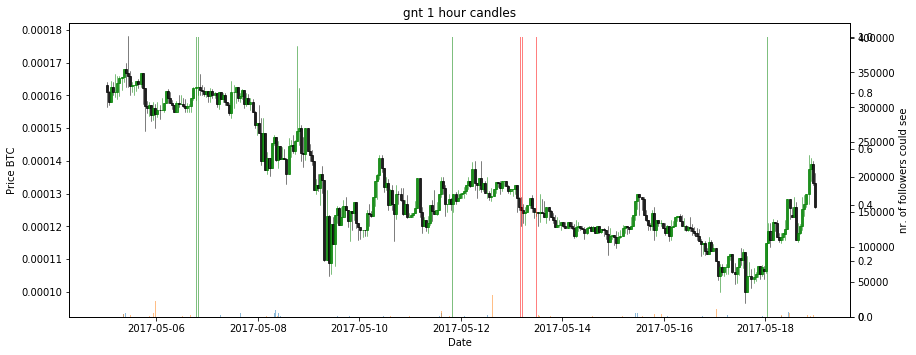

In [21]:



df_ohlc= coin.pricehourly.copy()
df_ohlc=df_ohlc[['datetime','open','high','low','close']]
#df_ohlc=df_ohlc.drop(['time1','volumefrom','volumeto'],axis=1)
#fromperiod='2017-12-01'
#toperiod='2018-03-20'
#sigwidth=0.2
fromperiod=str(buysig.iloc[0]['year'])+'-'+str(buysig.iloc[0]['month'])+'-'+str(buysig.iloc[0]['day'])
fromperiod='2017-5-5'
print(fromperiod)
toperiod='2017-5-19'
sigwidth=0.02

df_ohlc=df_ohlc[(df_ohlc['datetime'] >= fromperiod) & (df_ohlc['datetime'] < toperiod)]

#Please check if it was needed:
#print("Please check if it was NEEDED:")
#coin.gtdf['max_datetime']
#coin.gtdf['max_datetime_epoch']=coin.gtdf['max_datetime']
#coin.gtdf['max_datetime']=pd.to_datetime(coin.gtdf['max_datetime'].astype('int')*int(1e6))
#coin.grtdf['max_datetime_epoch']=coin.grtdf['max_datetime']
#coin.grtdf['max_datetime']=pd.to_datetime(coin.grtdf['max_datetime'].astype('int')*int(1e6))


gcoin_tweet_tmp=coin.gtdf.copy()
gcoin_tweet_tmp=gcoin_tweet_tmp[(gcoin_tweet_tmp['max_datetime'] > fromperiod) & (gcoin_tweet_tmp['max_datetime'] < toperiod)]

grtdf_tmp=coin.grtdf.copy()
grtdf_tmp=grtdf_tmp[(grtdf_tmp['max_datetime'] > fromperiod) & (grtdf_tmp['max_datetime'] < toperiod)]
buysig_tmp=buysig.copy()
buysig_tmp['datetime_roundup_str']=buysig_tmp['year'].map(str)+'-'+buysig_tmp['month'].map(str)+'-'+buysig_tmp['day'].map(str)+' '+(buysig_tmp['hour']).map(str)+':00:00'
#print(buysig_tmp)
buysig_tmp['datetime_roundup']=buysig_tmp['datetime_roundup_str'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
buysig_tmp=buysig_tmp[(buysig_tmp['datetime_roundup'] > fromperiod) & (buysig_tmp['datetime_roundup'] < toperiod)]

#Reset the index to remove Date column from index
#df_ohlc = df_ohlc.reset_index()

#Naming columns
#df_ohlc.columns = ["Date","Open","High",'Low',"Close"]

#Converting dates column to float values
df_ohlc['datetime'] = df_ohlc['datetime'].map(mdates.date2num)

buysig_tmp['datetime_rounded_up']=buysig_tmp['datetime_roundup'].map(mdates.date2num)

#Making plot
fig = plt.figure(figsize=(14,6))
#ax1 = plt.subplot2grid((9,1), (0,0), rowspan=6, colspan=1)

ax1 = plt.subplot()

#Converts raw mdate numbers to dates
ax1.xaxis_date()
plt.xlabel("Date")
plt.ylabel("Price BTC")
#print(df_ohlc)

#Making candlestick plot
candlewidth=0.04
(lines, patches)=candlestick_ohlc(ax1,df_ohlc.values,width=candlewidth, colorup='g', colordown='k',alpha=0.75)
#plt.xticks(rotation=90)


for pat in patches:
    pat.xy=(pat.xy[0]+candlewidth/2,pat.xy[1])
for line in lines:
    line.set_xdata((line.get_xdata()[0]+candlewidth/2,line.get_xdata()[1]+candlewidth/2))
    #pat.x=(pat.xy[0]+candlewidth/2,pat.xy[1])

ax2 = ax1.twinx()

buysig_tmp_good=buysig_tmp[buysig_tmp['buysig']==1]
buysig_tmp_bad=buysig_tmp[buysig_tmp['buysig']!=1]

#ax2.plot(coin_tweet_tmp['timestamp'],coin_tweet_tmp['score'], 'o',alpha=0.5)
if(len(buysig_tmp)>0):
    # adding 0.041 as one hour to the bar 
    ax2.bar(buysig_tmp_good['datetime_rounded_up']+0.041,1, width=sigwidth, align='center',alpha=0.5,color='g')
    ax2.bar(buysig_tmp_bad['datetime_rounded_up']+0.041,1, width=sigwidth, align='center',alpha=0.5,color='r')
ax3 = ax1.twinx()
ax3.bar(gcoin_tweet_tmp['max_datetime'], gcoin_tweet_tmp['follower_count'], width=0.01, align='center',alpha=0.5)
ax3.bar(grtdf_tmp['max_datetime'], grtdf_tmp['retweeter_followers'], width=0.01, align='center',alpha=0.5)

print("gcoin_tweet_tmp.head()")
#print(gcoin_tweet_tmp.head())
print("grtdf_tmp.head()")
#print(grtdf_tmp.head())

#plt.ylim(ymax=1000)
plt.ylabel("nr. of followers could see")


plt.title(coin.name+" 1 hour candles")
#plt.legend(['buysignal','orig tweets\' followers #OmiseGo','retweets\' followers #OmiseGo'])

fig.subplots_adjust(bottom=0.2)
plt.savefig(coin.name+'-'+fromperiod)
plt.show()
#buysig_tmp_good

In [ ]:
#filename=coin.name+"180419_bsig1_prec1.0_tre0.5_aimr6_offs8"
#coin.save_scaler_with_filename(min_max_scaler,"found_scaler_"+filename+".pkl")
#model.save("./data/altcoin-storage/"+coin.name+"_keras_model.h5")

#model.save("./data/altcoin-storage/found_model_"+filename+"_keras.h5")

In [17]:
p=Prediction()
metrics={"precision":precision,'recall':recall}

model=p.load_model_by_filename("gnt/found_gnt_bsig30.0_prec0.8333333333333334_tre74_aimr1.7_decr-0.5_offs4_actmet_tanh_keras_model.h5",metrics)





init Prediction
